# 🏥 Mini Capstone Project – Medical Data Processing  
## 📌 Overview  
Welcome to the **Mini Capstone Project!** This project challenges you to apply **Python, Object-Oriented Programming (OOP), NumPy, and Data Structures** to solve a real-world medical problem.  

### 🎯 Objectives  
- Implement **OOP concepts** for structured code.  
- Utilize **NumPy** for efficient medical data processing.  
- Manage patient data using **data structures** like lists and dictionaries.  
- Work collaboratively in **Kaggle’s shared workspace**.  

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

In [2]:
class MedicalImageProcessor:
    def __init__(self, dataset_path):
        self.dataset_path = dataset_path
        self.valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']
        self.data = pd.DataFrame(columns = ['images', 'labels'])

    def load_data(self):
        """Charge les chemins des images et leurs labels dans un DataFrame."""
        images_path, labels = [], []
        
        for dirname in os.listdir(self.dataset_path):
            dir_path = os.path.join(self.dataset_path, dirname)
            if os.path.isdir(dir_path):
                for label in os.listdir(dir_path):
                    label_path = os.path.join(dir_path, label)
                    if os.path.isdir(label_path):
                        for image in os.listdir(label_path):
                            if any(image.endswith(extension) for extension in self.valid_extensions):
                                images_path.append(os.path.join(label_path, image))
                                labels.append(label)
                                
        self.data = pd.DataFrame({'images': images_path, 'labels': labels})
        print(f'Dataset loaded: {len(self.data)} images')

    def require_data_loaded(func):
        """Décorateur pour s'assurer que les données sont chargées avant d'exécuter une méthode."""
        def wrapper(self, *args, **kwargs):
            if self.data.empty:
                raise ValueError("Erreur : Les données ne sont pas chargées. Veuillez appeler `load_data()` d'abord.")
            return func(self, *args, **kwargs)
        return wrapper

    @require_data_loaded
    def get_image_mode(self, index = 0):
        """Retourne le mode d'une image"""
        image = self.data.iloc[index]['images']
        image = Image.open(image)
        print(f'Image mode : {image.mode}')

    @require_data_loaded
    def visualize_class_distribution(self):
        """Affiche un camembert de la distribution des classes."""
        fig, ax = plt.subplots()
        ax.pie(self.data['labels'].value_counts(), labels = self.data['labels'].value_counts().index, autopct = '%1.1f%%')
        ax.set_title('Distribution des Classes')
        plt.show()

    @require_data_loaded
    def visualize_sample_images(self, nrows = 2, ncols = 5):
        """Affiche un échantillon d'images avec leurs labels."""
        fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (15, 5))
        
        for row in range(nrows):
            for col in range(ncols):
                sample = self.data.sample(n = 1)
                image = Image.open(sample['images'].iloc[0]).convert('RGB')
                label = sample['labels'].iloc[0]

                axes[row, col].imshow(image)
                axes[row, col].set_title(label)
                axes[row, col].axis('off')
                
        plt.show()

    @require_data_loaded
    def analyze_image_sizes(self):
        """Analyse les tailles des images et affiche des statistiques."""
        sizes = [Image.open(path).size for path in self.data["images"]]
        sizes = pd.DataFrame(sizes, columns=["Width", "Height"])

        # Histogramme des dimensions
        fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
        
        sns.histplot(sizes['Width'], bins = 30, kde = True, color = "royalblue", ax = axes[0])
        axes[0].set_title('Largeur')

        sns.histplot(sizes['Height'], bins = 30, kde = True, color = "crimson", ax = axes[1])
        axes[1].set_title('Hauteur')

        plt.tight_layout()
        plt.show()

        # Boxplot des tailles
        plt.figure(figsize = (10, 5))
        sns.boxplot(data = sizes, palette = ['royalblue', 'crimson'])
        plt.title("Boxplot des Dimensions des Images")
        
        plt.show()

    @require_data_loaded
    def compute_color_statistics(self):
        """Calcule les moyennes des composantes Rouge, Vert et Bleu des images."""
        mean_red, mean_green, mean_blue = [], [], []

        for image_path in self.data["images"]:
            image = Image.open(image_path).convert("RGB")
            image_array = np.array(image)

            mean_red.append(np.mean(image_array[:, :, 0]))
            mean_green.append(np.mean(image_array[:, :, 1]))
            mean_blue.append(np.mean(image_array[:, :, 2]))

        print(f'Moyenne Rouge : {np.mean(mean_red):.2f}')
        print(f'Moyenne Vert  : {np.mean(mean_green):.2f}')
        print(f'Moyenne Bleu  : {np.mean(mean_blue):.2f}')

    @require_data_loaded
    def analyze_aspect_ratios(self):
        """Analyse et affiche la distribution des ratios d'aspect des images."""
        sizes = [Image.open(path).size for path in self.data["images"]]
        sizes = pd.DataFrame(sizes, columns = ["Width", "Height"])
        sizes["aspect_ratio"] = sizes["Width"] / sizes["Height"]

        plt.figure(figsize = (10, 5))
        
        sns.histplot(sizes["aspect_ratio"], bins = 30, kde = True, color = "purple")
        plt.title("Distribution des Ratios d'Aspect des Images")
        plt.xlabel("Ratio (Largeur / Hauteur)")
        
        plt.show()

In [3]:
dataset_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray'
processor = MedicalImageProcessor(dataset_path)

In [4]:
processor.load_data()

Dataset loaded: 5856 images


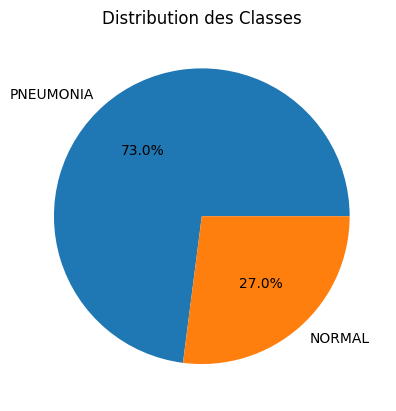

In [5]:
processor.visualize_class_distribution()

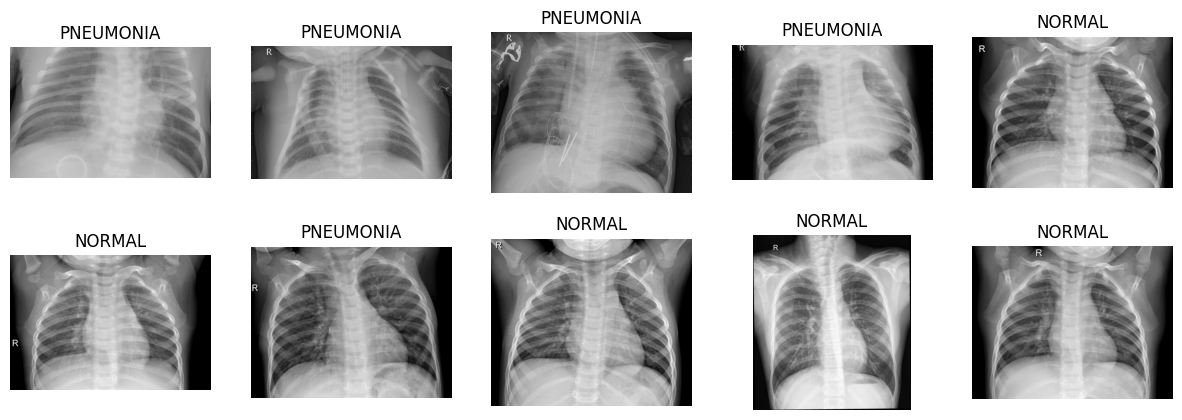

In [6]:
processor.visualize_sample_images()

In [7]:
processor.get_image_mode(9)

Image mode : L


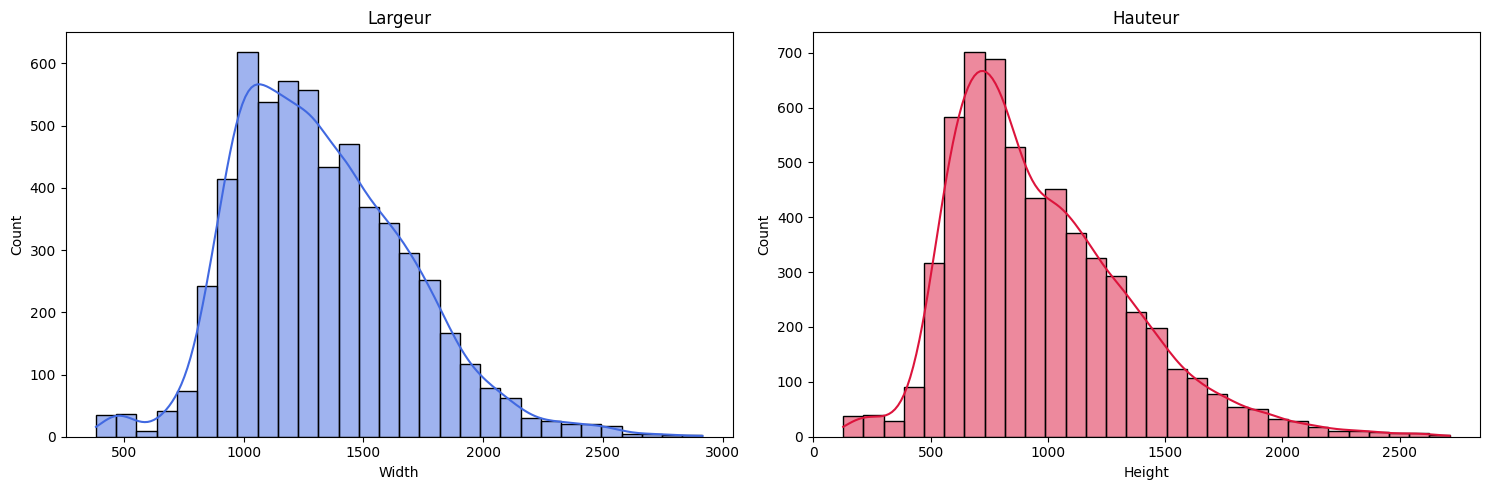

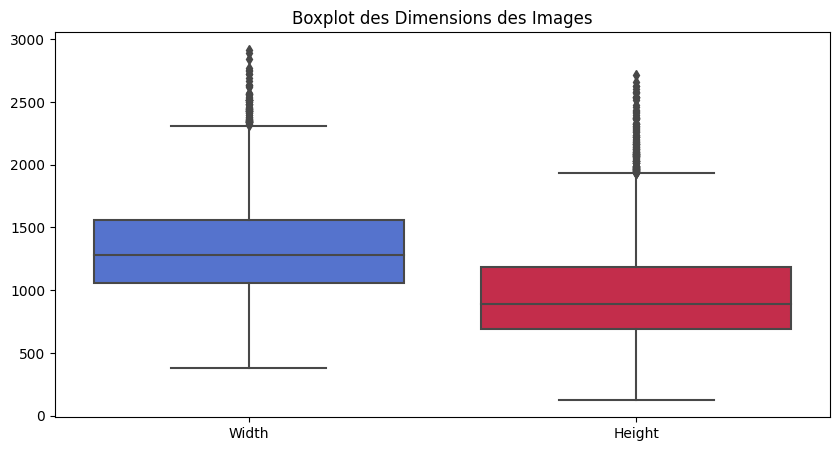

In [8]:
processor.analyze_image_sizes()

In [9]:
processor.compute_color_statistics()

Moyenne Rouge : 122.79
Moyenne Vert  : 122.79
Moyenne Bleu  : 122.79


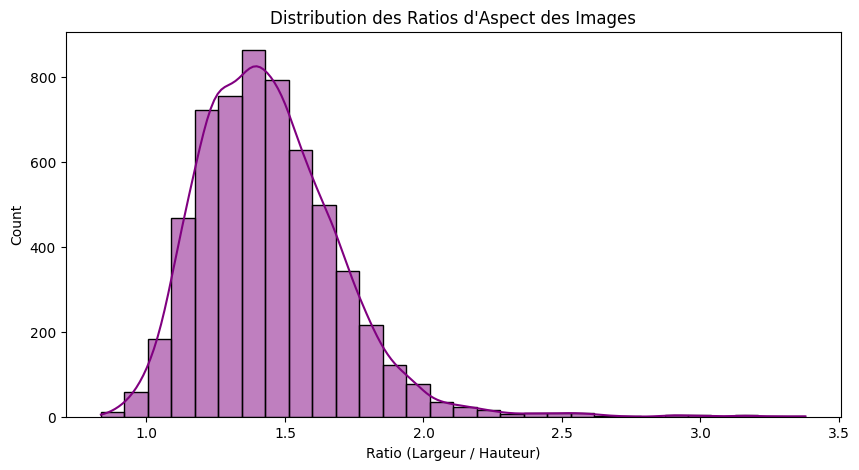

In [10]:
processor.analyze_aspect_ratios()